## 今天的作業
在鐵達尼資料集中，今天我們專注觀察變數之間的相關性，以Titanic_train.csv 中，首先將有遺失值的數值刪除，我們取 Titanic_train.csv 的年齡資料，試著將課堂中所學的方法應用上去。

* Q1: 產生一個新的變數(Age_above65_) Age>=65為 'Y'，其餘為'N'。  
* Q2: 添加女性和男性，產生一個新的變數(Age_above65_female)，女性或Age>=65為'Y'，其餘為'N'。  
* Q3: 透過昨天課程的內容，驗證產生的兩個新變數，哪一個和目標變數(Survived_cate)的相關性較高?

  A3: Sex和Age_above65_female

In [1]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display
import sklearn
print(sklearn.__version__)
#如果只有 0.19 記得要更新至 最新版本
%matplotlib inline


#顯示所有行
pd.set_option('display.max_columns', None)
#顯示所有列
pd.set_option('display.max_rows', None)
#顯示行設定
pd.set_option('max_colwidth',100)

import pingouin as pg
import researchpy   
 

0.23.2


## 讀入資料

In [2]:
df_train = pd.read_csv("Titanic_train.csv")
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
#1.產稱一個新的變數 Survived_cate ，資料型態傳換成類別型態      
#2.把題目中的 Survived 用 Survived_cate 來做分析    
df_train['Survived_cate']=df_train['Survived']
df_train['Survived_cate']=df_train['Survived_cate'].astype('object')
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  Survived_cate  891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB
None


In [8]:
#我們先把遺失值刪除
## 取出資料後，把遺失值刪除
complete_data=df_train[['Age','Survived_cate','Sex']].dropna()
display(complete_data.head(5))

,Age,Survived_cate,Sex
0,22.0,0,male
1,38.0,1,female
2,26.0,1,female
3,35.0,1,female
4,35.0,0,male


### Q1: 產生一個新的變數(Age_above65_) Age>=65為 'Y'，其餘為'N'。


In [13]:
def age_reahape(x):
    if (x >= 65):
        return('Y')
    else :
        return('N')
complete_data['Age_above65_']= complete_data['Age'].apply(age_reahape)
display(complete_data.head(5))

,Age,Survived_cate,Sex,Age_above65_female,Age_above65_
0,22.0,0,male,N,N
1,38.0,1,female,Y,N
2,26.0,1,female,Y,N
3,35.0,1,female,Y,N
4,35.0,0,male,N,N


### Q2: 添加女性和男性，產生一個新的變數(Age_above65_female)，女性或Age>=65為'Y'，其餘為'N'。
* 暗示: 觀看下面影片找答案，https://www.youtube.com/watch?v=X2d-wUt5azY

In [14]:
def age_reahape_2(x):
    if (x.Sex == 'female'):
        return('Y')
    else :
        if (x.Age >= 65):
            return('Y')
        else:
            return('N')
    
complete_data['Age_above65_female']= complete_data.apply(age_reahape_2,axis=1)
display(complete_data.head(5))

,Age,Survived_cate,Sex,Age_above65_female,Age_above65_
0,22.0,0,male,N,N
1,38.0,1,female,Y,N
2,26.0,1,female,Y,N
3,35.0,1,female,Y,N
4,35.0,0,male,N,N


### Q3: 透過昨天課程的內容，驗證產生的兩個新變數，哪一個和目標變數(Survived_cate)的相關性較高?
* 提示:    
  首先觀察一下這些變數的資料型態後，再來想要以哪一種判斷倆倆的相關性。     

In [15]:
print(complete_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 714 non-null    float64
 1   Survived_cate       714 non-null    object 
 2   Sex                 714 non-null    object 
 3   Age_above65_female  714 non-null    object 
 4   Age_above65_        714 non-null    object 
dtypes: float64(1), object(4)
memory usage: 33.5+ KB
None


### (1) Age 和 Survived_cate
#兩變數間相關性為: Negligible

In [16]:
##  Age:連續型 ，Survived_cate:離散型，所以採用 Eta Squared
# step 1.
ccw = complete_data[['Age','Survived_cate']]
ccw.head(5)

,Age,Survived_cate
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


In [20]:
# step 2.
aov = pg.anova(dv='Age',between='Survived_cate',data= ccw,detailed =True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,Survived_cate,897.187582,1,897.187582,4.271195,0.039125,0.005963
1,Within,149559.448362,712,210.055405,NaN,NaN,NaN


In [22]:
# step 3.
etasql = aov.SS[0]/(aov.SS[0]+aov.SS[1])
etasql

0.0059630974469252

In [43]:
def judge_aov (x):
    if x <.01:
        return('Negligible')
    elif x <.06:
        return('Small')
    elif x <.14:
        return('Medium')
    else :
        return('Large')
print('兩變數間相關性為:',judge_aov(etasql))

兩變數間相關性為: Negligible


### (2) Sex 和 Survived_cate
#兩變數間相關性為: large

In [27]:
##  Sex:離散型，Survived_cate:離散型，所以採用  Cramér's V
conTable = pd.crosstab(complete_data['Sex'],complete_data['Survived_cate'])
display(conTable)

Survived_cate,0,1
Sex,,
female,64,197
male,360,93


In [30]:
# 計算自由度
df = min(conTable.shape[0],conTable.shape[1])-1
df

1

In [38]:
#  計算Cramer's value
cross, res = researchpy.crosstab(complete_data['Survived_cate'],complete_data['Sex'],test='chi-square')

print("Cramer's value is",res.loc[2,'results'])

Cramer's value is 0.5388


In [44]:
## 寫一個副程式判斷相關性的強度
def judgment_CramerV(df,V):
    if df == 1:
        if V < 0.10:
            qual = 'negligible'
        elif V < 0.30:
            qual = 'small'
        elif V < 0.50:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 2:
        if V < 0.07:
            qual = 'negligible'
        elif V < 0.21:
            qual = 'small'
        elif V < 0.35:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 3:
        if V < 0.06:
            qual = 'negligible'
        elif V < 0.17:
            qual = 'small'
        elif V < 0.29:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 4:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.15:
            qual = 'small'
        elif V < 0.25:
            qual = 'medium'
        else:
            qual = 'large'
    else:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.13:
            qual = 'small'
        elif V < 0.22:
            qual = 'medium'
        else:
            qual = 'large'
    return(qual)
print('兩變數間相關性為:',judgment_CramerV(df,res.loc[2,'results']))


兩變數間相關性為: large


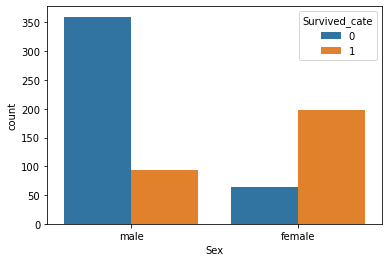

In [46]:
g = sns.countplot(x= 'Sex',hue= 'Survived_cate',data=complete_data)

### (3) Age_above65_ 和 Survived_cate

#兩變數間相關性為: negligible

In [52]:
##  Age_above65_:離散型，Survived_cate:離散型，所以採用  Cramér's V

conTable_2 = pd.crosstab(complete_data['Age_above65_'],complete_data['Survived_cate'])
display(conTable_2)

Survived_cate,0,1
Age_above65_,,
N,414,289
Y,10,1


In [54]:
# 計算自由度
df = min(conTable_2.shape[0],conTable_2.shape[1])-1
df

1

In [55]:
#  計算Cramer's value
cross, res = researchpy.crosstab(complete_data['Survived_cate'],complete_data['Age_above65_'],test='chi-square')

print("Cramer's value is",res.loc[2,'results'])

Cramer's value is 0.0803


In [56]:
## 寫一個副程式判斷相關性的強度
def judgment_CramerV(df,V):
    if df == 1:
        if V < 0.10:
            qual = 'negligible'
        elif V < 0.30:
            qual = 'small'
        elif V < 0.50:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 2:
        if V < 0.07:
            qual = 'negligible'
        elif V < 0.21:
            qual = 'small'
        elif V < 0.35:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 3:
        if V < 0.06:
            qual = 'negligible'
        elif V < 0.17:
            qual = 'small'
        elif V < 0.29:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 4:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.15:
            qual = 'small'
        elif V < 0.25:
            qual = 'medium'
        else:
            qual = 'large'
    else:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.13:
            qual = 'small'
        elif V < 0.22:
            qual = 'medium'
        else:
            qual = 'large'
    return(qual)
print('兩變數間相關性為:',judgment_CramerV(df,res.loc[2,'results']))


兩變數間相關性為: negligible


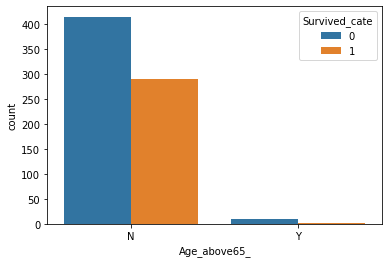

In [57]:
g = sns.countplot(x= 'Age_above65_',hue= 'Survived_cate',data=complete_data)

### (4) Age_above65_female 和 Survived_cate

#兩變數間相關性為: large 

In [58]:
##  Age_above65_female:離散型，Survived_cate:離散型，所以採用  Cramér's V

conTable_3 = pd.crosstab(complete_data['Age_above65_female'],complete_data['Survived_cate'])
display(conTable_3)

Survived_cate,0,1
Age_above65_female,,
N,350,92
Y,74,198


In [59]:
df = min(conTable_3.shape[0],conTable_3.shape[1])-1
df

1

In [60]:
#  計算Cramer's value
cross, res = researchpy.crosstab(complete_data['Survived_cate'],complete_data['Age_above65_female'],test='chi-square')

print("Cramer's value is",res.loc[2,'results'])

Cramer's value is 0.514


In [61]:
## 寫一個副程式判斷相關性的強度
def judgment_CramerV(df,V):
    if df == 1:
        if V < 0.10:
            qual = 'negligible'
        elif V < 0.30:
            qual = 'small'
        elif V < 0.50:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 2:
        if V < 0.07:
            qual = 'negligible'
        elif V < 0.21:
            qual = 'small'
        elif V < 0.35:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 3:
        if V < 0.06:
            qual = 'negligible'
        elif V < 0.17:
            qual = 'small'
        elif V < 0.29:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 4:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.15:
            qual = 'small'
        elif V < 0.25:
            qual = 'medium'
        else:
            qual = 'large'
    else:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.13:
            qual = 'small'
        elif V < 0.22:
            qual = 'medium'
        else:
            qual = 'large'
    return(qual)
print('兩變數間相關性為:',judgment_CramerV(df,res.loc[2,'results']))


兩變數間相關性為: large


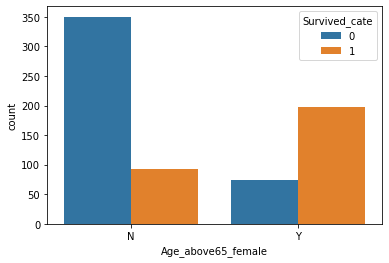

In [62]:
g = sns.countplot(x= 'Age_above65_female',hue= 'Survived_cate',data=complete_data)